# Explore here

In [1]:
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import pickle
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### --- Configuraciones Iniciales ---

In [2]:
BASE_PATH = "../data/processed"
MODEL_PATH = "../models/Naive_Bayes_model.sav"


### --- Carga de Datos ---

In [3]:
TRAIN_PATHS = ['X_train.xlsx', 'X_train_tfidf.xlsx']
TEST_PATHS = ["X_test.xlsx", 'X_test_tfidf.xlsx']

TRAIN_DATASETS = [pd.read_excel(f"{BASE_PATH}/{path}") for path in TRAIN_PATHS]
TEST_DATASETS = [pd.read_excel(f"{BASE_PATH}/{path}") for path in TEST_PATHS]

y_train = pd.read_excel(f"{BASE_PATH}/y_train.xlsx")
y_test = pd.read_excel(f"{BASE_PATH}/y_test.xlsx")

### --- Entrenamiento y Evaluación Inicial del Modelo ---

In [4]:
results = []
for index, dataset in enumerate(TRAIN_DATASETS):
    model = BernoulliNB()
    model.fit(dataset, y_train)
    y_pred_train = model.predict(dataset)
    y_pred_test = model.predict(TEST_DATASETS[index])
    results.append({
        "train": accuracy_score(y_train, y_pred_train),
        "test": accuracy_score(y_test, y_pred_test)
    })

print("Initial Model Results:", results)

Initial Model Results: [{'train': 0.9129213483146067, 'test': 0.7653631284916201}, {'train': 0.9129213483146067, 'test': 0.7653631284916201}]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### --- Optimización del Modelo con GridSearchCV ---

In [5]:
best_dataset = 0  # Index del mejor dataset basado en los resultados iniciales
hyperparams = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],
    'binarize': [0.0, 0.1, 0.2, 0.3, 0.5, 1.0],
    'fit_prior': [True, False],
    'class_prior': [None, [0.25, 0.25, 0.25, 0.25]]
}

grid = GridSearchCV(BernoulliNB(), hyperparams, scoring="accuracy")
grid.fit(TRAIN_DATASETS[best_dataset], y_train)

print("Best Estimator:", grid.best_estimator_)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/uti

Best Estimator: BernoulliNB(alpha=0.01)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/mod

### --- Evaluación del Modelo Optimizado ---

In [6]:
final_model = grid.best_estimator_
y_pred_train = final_model.predict(TRAIN_DATASETS[best_dataset])
y_pred_test = final_model.predict(TEST_DATASETS[best_dataset])

score_train = accuracy_score(y_train, y_pred_train)
score_test = accuracy_score(y_test, y_pred_test)

print(f'Score train: {score_train}')
print(f'Score test: {score_test}')

Score train: 0.9915730337078652
Score test: 0.8379888268156425


### --- Generación de Nube de Palabras ---

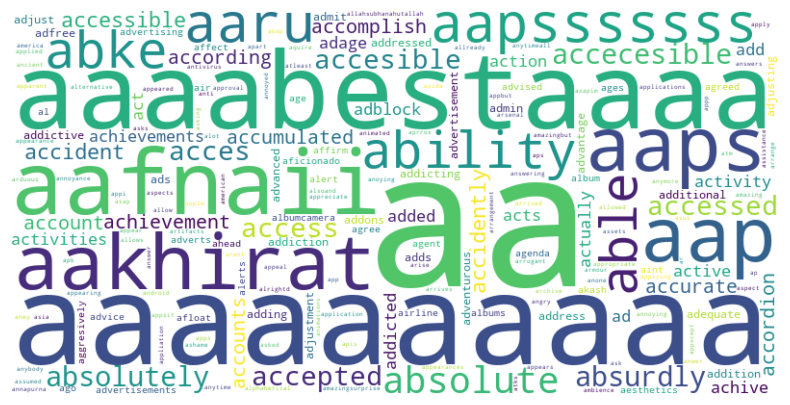

In [7]:
# Carga el vectorizador
import pickle
with open('../data/processed/CountVectorizer.pkl', 'rb') as file:
    vectorizer = pickle.load(file)

# Obtiene las palabras (features) del vectorizador
feature_names = vectorizer.get_feature_names_out()

# Crea un diccionario de frecuencias de palabras (puedes ajustar esto si tienes frecuencias reales)
word_frequencies = dict(zip(feature_names, [1] * len(feature_names)))

# Genera la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### --- Guardar el Modelo ---

In [8]:
with open(MODEL_PATH, "wb") as file:
    pickle.dump(final_model, file)